In [1]:
from src import config
from src.hand_analysis.runner.run_hand_analysis import run_analysis_with_configuration_parameters

analysis = run_analysis_with_configuration_parameters(config.DATA_DIR)
experiment = analysis.experiment

2025-05-29 20:00:17,983 [INFO] root: Processing subject: 0001, group: control
2025-05-29 20:00:18,185 [INFO] root: Processing subject: 0002, group: control
2025-05-29 20:00:18,405 [WARNING] root: No target was hit in the cursor trail.
2025-05-29 20:00:18,412 [INFO] root: Processing subject: 0003, group: MCI
2025-05-29 20:00:18,568 [INFO] root: Processing subject: 0004, group: MCI
2025-05-29 20:00:18,670 [WARNING] root: No target was hit in the cursor trail.
2025-05-29 20:00:18,750 [WARNING] root: No target was hit in the cursor trail.
2025-05-29 20:00:18,756 [WARNING] root: No target was hit in the cursor trail.
2025-05-29 20:00:18,767 [WARNING] root: No target was hit in the cursor trail.
2025-05-29 20:00:18,771 [INFO] root: Processing subject: 0005, group: MCI
2025-05-29 20:00:18,891 [WARNING] root: No target was hit in the cursor trail.
2025-05-29 20:00:19,001 [INFO] root: Processing subject: 0006, group: control
2025-05-29 20:00:19,151 [INFO] root: Processing subject: 0007, group: 

Metrics DataFrame:
  subject_id  trial_id trial_type  age gender  is_valid  \
0       0001         8     PART_A   35      M      True   
1       0001         7     PART_B   35      M      True   
2       0001        11     PART_A   35      M      True   
3       0001        21     PART_B   35      M      True   
4       0001         1     PART_A   35      M      True   

   trial_order_of_appearance  speed_threshold  non_cut_zigzag_amplitude  \
0                          2         0.250905                       NaN   
1                          3         0.250905                  1.133422   
2                          4         0.250905                       NaN   
3                          5         0.250905                  1.480975   
4                          6         0.250905                       NaN   

   non_cut_total_distance  ...  max_duration  \
0                3.724429  ...      4.333857   
1                3.451943  ...      0.766811   
2                3.498912  ... 

In [8]:
subject = experiment.subjects["0007"]
subject

TMTSubject(training_trials=[], testing_trials=[TMTTrial(stimuli=[TMTTarget(content='1', position=Coordinate(x=-0.2504826666666666, y=-0.26275288888888887)), TMTTarget(content='2', position=Coordinate(x=-0.337096, y=-0.15551733333333337)), TMTTarget(content='3', position=Coordinate(x=0.0959706666666666, y=-0.3431795555555555)), TMTTarget(content='4', position=Coordinate(x=-0.048384888888888894, y=-0.1823262222222222)), TMTTarget(content='5', position=Coordinate(x=-0.2504826666666666, y=-0.021472888888888864)), TMTTarget(content='6', position=Coordinate(x=0.15371288888888895, y=0.246616)), TMTTarget(content='7', position=Coordinate(x=0.24032622222222225, y=0.35385155555555553)), TMTTarget(content='8', position=Coordinate(x=0.2980684444444444, y=0.2734248888888889)), TMTTarget(content='9', position=Coordinate(x=0.3846817777777779, y=0.08576266666666668)), TMTTarget(content='10', position=Coordinate(x=0.3269395555555557, y=0.35385155555555553)), TMTTarget(content='11', position=Coordinate(

In [9]:

from neurotask.tmt.metrics.speed_metrics import calculate_speeds_between_cursor_positions
from neurotask.tmt.metrics.speed_metrics import calculate_accelerations_between_cursor_positions
from matplotlib import pyplot as plt
from build.lib.neurotask.tmt.model.tmt_model import TMTTrial


def plot_with_color(trial: TMTTrial, canvas_size: int, target_radius: float, color_by='time'):
    """
    Plotea la trayectoria del cursor junto con los targets en un gráfico,
    ajustando el tamaño del gráfico al tamaño del canvas y dibujando círculos
    alrededor de los targets con su contenido. La trayectoria del cursor se
    dibuja con puntos cuyos colores cambian en función del tiempo, la velocidad o la aceleración.
    El primer clic en el target se destaca con un marcador especial.

    Parameters:
    - trial: TMTTrial, el trial con la trayectoria del cursor y los targets.
    - canvas_size: int, tamaño del canvas (ancho y alto).
    - target_radius: float, radio de los círculos que rodean los targets.
    - color_by: str, 'time', 'speed' o 'acceleration', determina si el color de los puntos cambia en función del tiempo, velocidad o aceleración.
    """

    # Extraer la posición de los targets
    target_x = [target.position.x for target in trial.stimuli]
    target_y = [target.position.y for target in trial.stimuli]
    target_contents = [target.content for target in trial.stimuli]

    cursor_trail_from_first_click = trial.get_cursor_trail_from_start()
    # Extraer la trayectoria del cursor
    cursor_x = [cursor_info.position.x for cursor_info in cursor_trail_from_first_click]
    cursor_y = [cursor_info.position.y for cursor_info in cursor_trail_from_first_click]
    cursor_times = [cursor_info.time for cursor_info in cursor_trail_from_first_click]

    if color_by == 'time':
        # Normalizar tiempos para que estén en el rango [0, 1]
        norm = plt.Normalize(min(cursor_times), max(cursor_times))
        colors = plt.cm.viridis(norm(cursor_times))  # Usar un mapa de colores para el tiempo
    elif color_by == 'speed':
        speeds = calculate_speeds_between_cursor_positions(trial)
        speeds = [0] + speeds  # Para igualar el número de puntos con las velocidades calculadas
        norm = plt.Normalize(min(speeds), max(speeds))
        colors = plt.cm.viridis(norm(speeds))  # Usar un mapa de colores para la velocidad
    elif color_by == 'acceleration':
        accelerations = calculate_accelerations_between_cursor_positions(trial)
        accelerations = [0, 0] + accelerations  # Igualar el número de puntos (2 primeros puntos sin aceleración)
        norm = plt.Normalize(min(accelerations), max(accelerations))
        colors = plt.cm.viridis(norm(accelerations))  # Usar un mapa de colores para la aceleración
    else:
        raise ValueError("El parámetro color_by debe ser 'time', 'speed' o 'acceleration'.")

    # Crear el gráfico
    fig, ax = plt.subplots(figsize=(8, 8))

    # Dibujar la trayectoria del cursor como líneas coloreadas por tiempo o velocidad
    for i in range(len(cursor_x) - 1):
        plt.plot([cursor_x[i], cursor_x[i + 1]],
                 [cursor_y[i], cursor_y[i + 1]],
                 color=colors[i], linewidth=2, zorder=4)

    # Dibujar los targets como círculos con el contenido dentro
    for x, y, content in zip(target_x, target_y, target_contents):
        circle = plt.Circle((x, y), target_radius, color='red', alpha=0.3, zorder=5)
        plt.gca().add_patch(circle)
        # Añadir el contenido del target en el centro del círculo
        plt.text(x, y, content, color='black', fontsize=8, ha='center', va='center', zorder=6)

    # Destacar el primer clic
    if trial.start:
        fc_x = trial.start.position.x
        fc_y = trial.start.position.y
        plt.scatter(fc_x, fc_y, color='cyan', edgecolor='black', s=100, label='First Click', zorder=7,
                    marker='o', alpha=0.3)

    sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
    sm.set_array([])
    cbar_label = 'Time' if color_by == 'time' else 'Speed' if color_by == 'speed' else 'Acceleration'
    cbar = fig.colorbar(sm, ax=ax, label=cbar_label)

    # # Set plot limits based on canvas size
    # ax.set_xlim(-canvas_size, canvas_size)
    # ax.set_ylim(canvas_size, -canvas_size,)  # Inverted Y-axis if needed

    # Add labels and title
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_title('Cursor Trail with Targets')

    # Ensure equal aspect ratio
    ax.set_aspect('equal', adjustable='box')

    # Add legend
    ax.legend()

    return fig

In [15]:
from src.hand_analysis.loader.load_last_split import load_last_analysis
train_set, _ = load_last_analysis()
subject_analysis = train_set[train_set['subject_id'] == 7]
subject_analysis

2025-05-29 20:10:18,400 [INFO] root: Loading split from /home/gianluca/Research/tmt-analysis/data/hand_analysis/2025-05-29_19-40-19


,subject_id,trial_id,trial_type,is_valid,trial_order_of_appearance,speed_threshold,zigzag_amplitude,total_distance,rt,mean_speed,...,non_cut_wrong_targets_touches,non_cut_number_of_crosses,non_cut_distance_difference_from_ideal,non_cut_area_difference_from_ideal,non_cut_intra_target_time,non_cut_inter_target_time,invalid_cause,sex,age,group
120,7,8,PART_A,False,2,0.153949,NaN,0.000000,25001.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CUT_CRITERIA_ERROR,F,77,HC
121,7,17,PART_B,False,3,0.153949,NaN,0.000000,24373.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CUT_CRITERIA_ERROR,F,77,HC
122,7,16,PART_A,False,4,0.153949,NaN,0.000000,25020.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CUT_CRITERIA_ERROR,F,77,HC
123,7,3,PART_B,False,5,0.153949,NaN,0.000000,25020.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CUT_CRITERIA_ERROR,F,77,HC
124,7,12,PART_A,False,6,0.153949,NaN,0.000000,25024.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CUT_CRITERIA_ERROR,F,77,HC
125,7,21,PART_B,False,7,0.153949,NaN,0.000000,25021.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CUT_CRITERIA_ERROR,F,77,HC
126,7,9,PART_A,False,8,0.153949,NaN,0.000000,25013.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CUT_CRITERIA_ERROR,F,77,HC
127,7,15,PART_B,False,9,0.153949,NaN,0.000000,25032.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,UNABLE_TO_DETERMINE_START,F,77,HC
128,7,11,PART_A,False,10,0.153949,NaN,0.000000,25033.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CUT_CRITERIA_ERROR,F,77,HC
129,7,10,PART_B,False,11,0.153949,NaN,0.000000,25007.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,UNABLE_TO_DETERMINE_START,F,77,HC


Trial ID: 8
Trial Type: TrialType.PART_A
Trial order: 2
Correct targets touches from analysis: nan
Wrong targets touches from analysis: nan


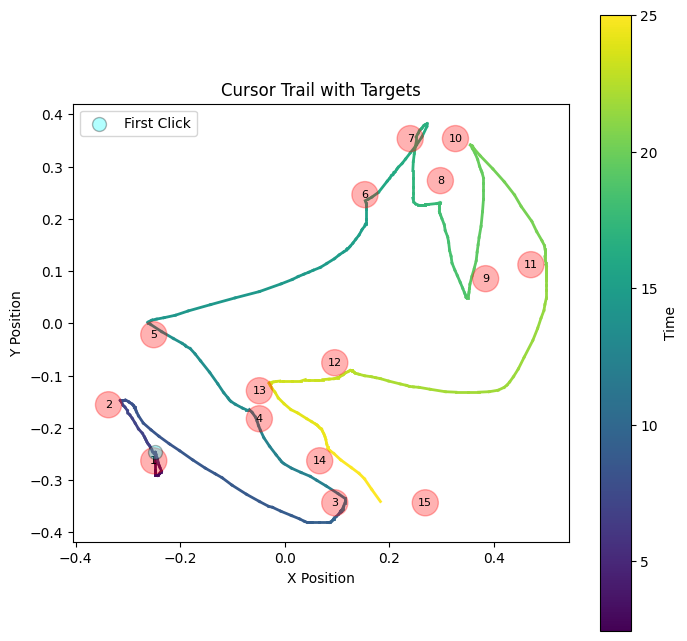

-----------------------------------------------

Trial ID: 17
Trial Type: TrialType.PART_B
Trial order: 3
Correct targets touches from analysis: nan
Wrong targets touches from analysis: nan


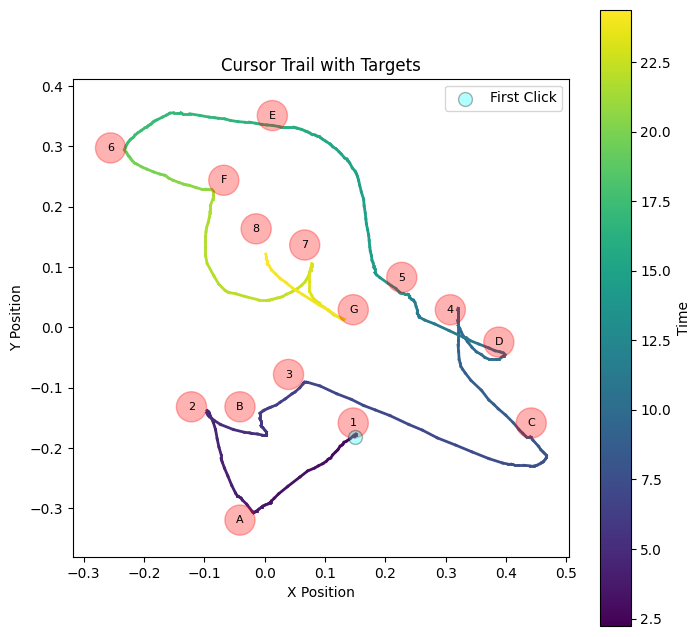

-----------------------------------------------

Trial ID: 16
Trial Type: TrialType.PART_A
Trial order: 4
Correct targets touches from analysis: nan
Wrong targets touches from analysis: nan


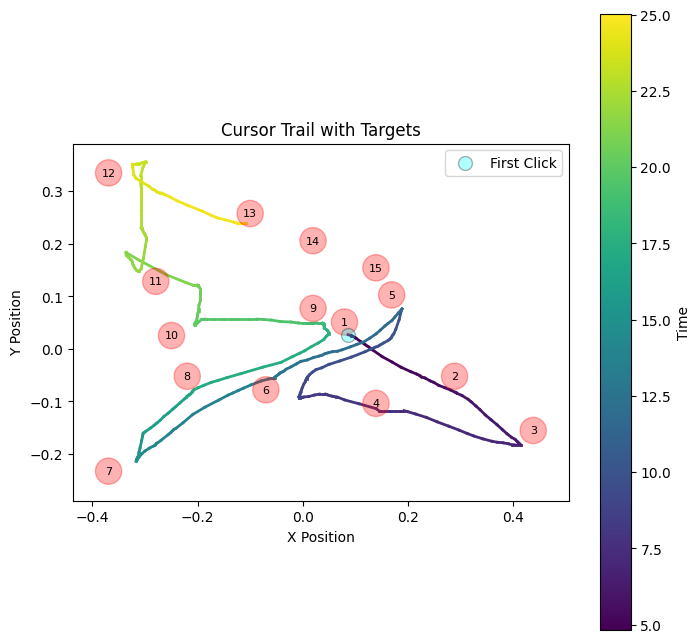

-----------------------------------------------

Trial ID: 3
Trial Type: TrialType.PART_B
Trial order: 5
Correct targets touches from analysis: nan
Wrong targets touches from analysis: nan


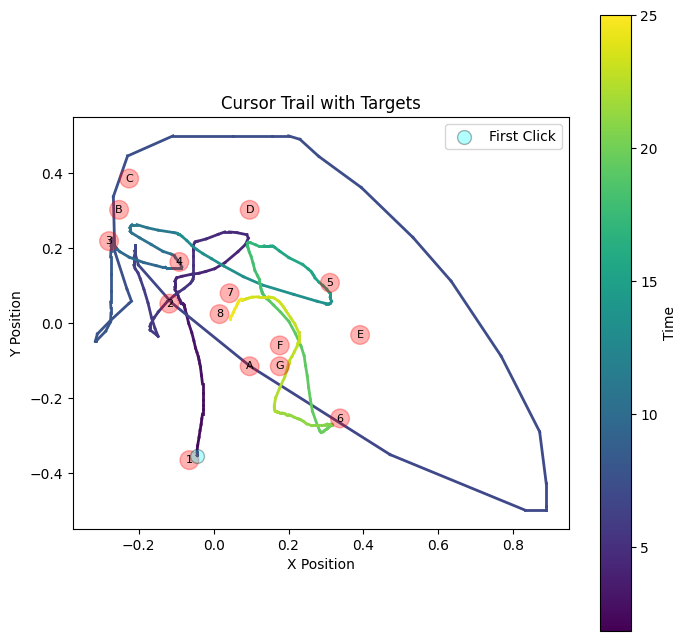

-----------------------------------------------

Trial ID: 12
Trial Type: TrialType.PART_A
Trial order: 6
Correct targets touches from analysis: nan
Wrong targets touches from analysis: nan


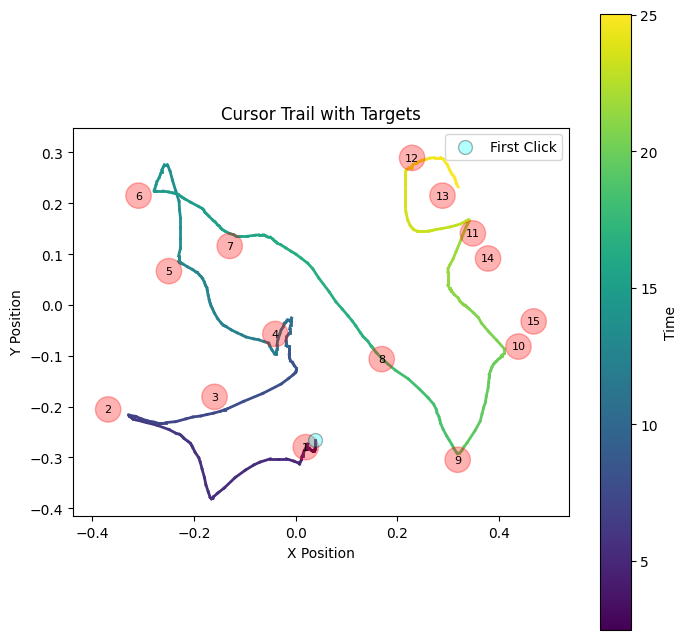

-----------------------------------------------

Trial ID: 21
Trial Type: TrialType.PART_B
Trial order: 7
Correct targets touches from analysis: nan
Wrong targets touches from analysis: nan


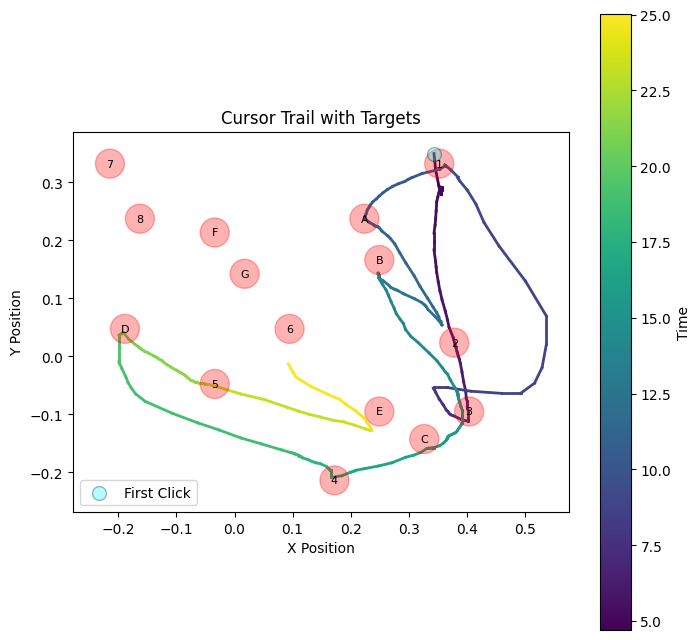

-----------------------------------------------

Trial ID: 9
Trial Type: TrialType.PART_A
Trial order: 8
Correct targets touches from analysis: nan
Wrong targets touches from analysis: nan


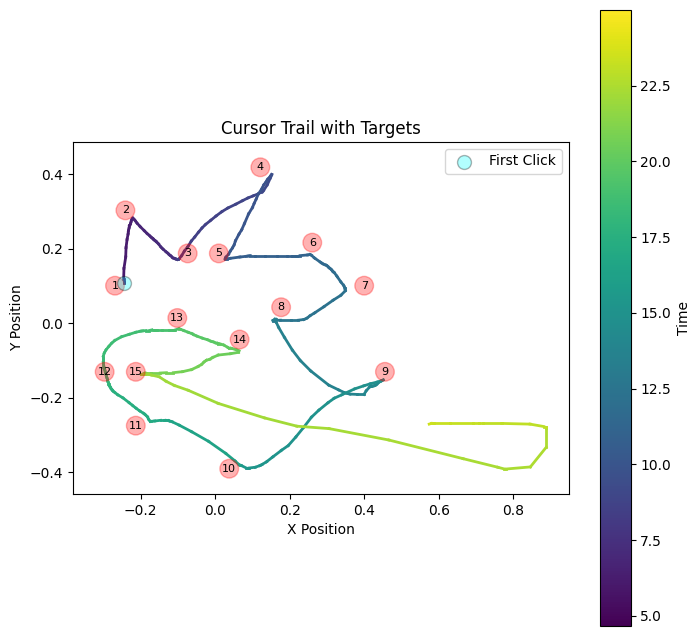

-----------------------------------------------

Trial ID: 15
Trial Type: TrialType.PART_B
Trial order: 9
Correct targets touches from analysis: nan
Wrong targets touches from analysis: nan
ERROR PLOTTING TRIAL
Trial ID: 11
Trial Type: TrialType.PART_A
Trial order: 10
Correct targets touches from analysis: nan
Wrong targets touches from analysis: nan


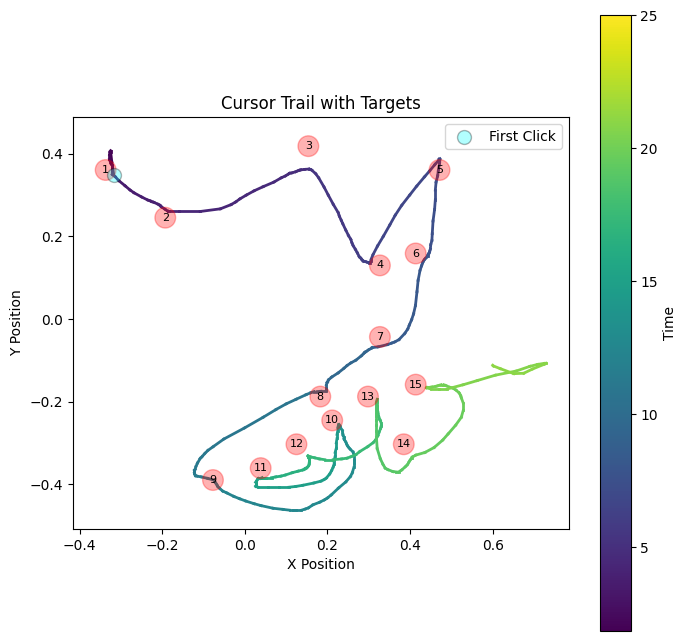

-----------------------------------------------

Trial ID: 10
Trial Type: TrialType.PART_B
Trial order: 11
Correct targets touches from analysis: nan
Wrong targets touches from analysis: nan
ERROR PLOTTING TRIAL
Trial ID: 1
Trial Type: TrialType.PART_A
Trial order: 12
Correct targets touches from analysis: nan
Wrong targets touches from analysis: nan
ERROR PLOTTING TRIAL
Trial ID: 5
Trial Type: TrialType.PART_B
Trial order: 13
Correct targets touches from analysis: nan
Wrong targets touches from analysis: nan


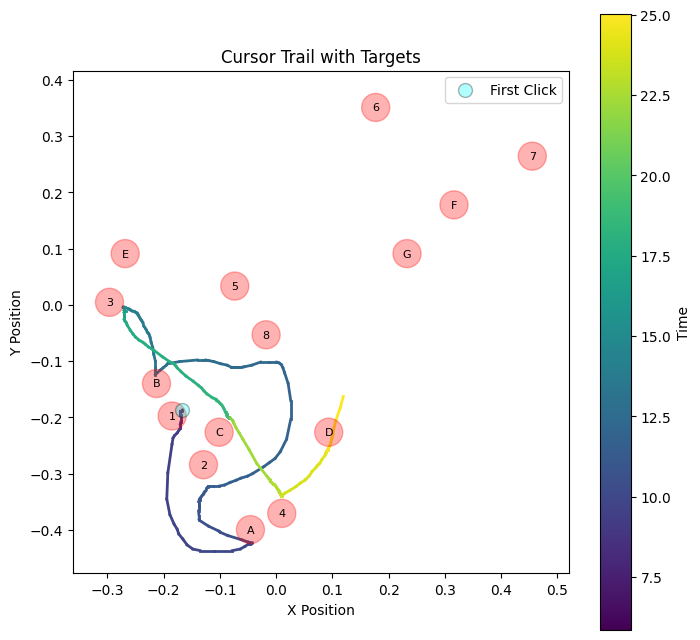

-----------------------------------------------

Trial ID: 6
Trial Type: TrialType.PART_A
Trial order: 14
Correct targets touches from analysis: nan
Wrong targets touches from analysis: nan


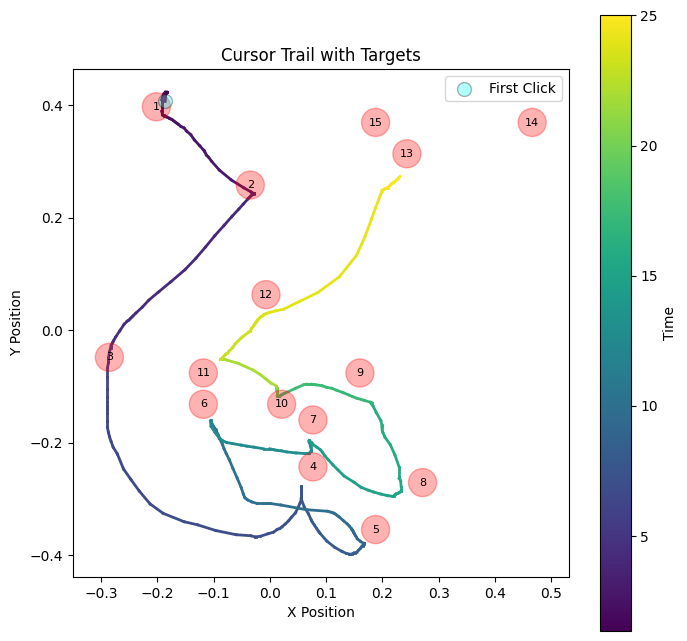

-----------------------------------------------

Trial ID: 2
Trial Type: TrialType.PART_B
Trial order: 15
Correct targets touches from analysis: nan
Wrong targets touches from analysis: nan


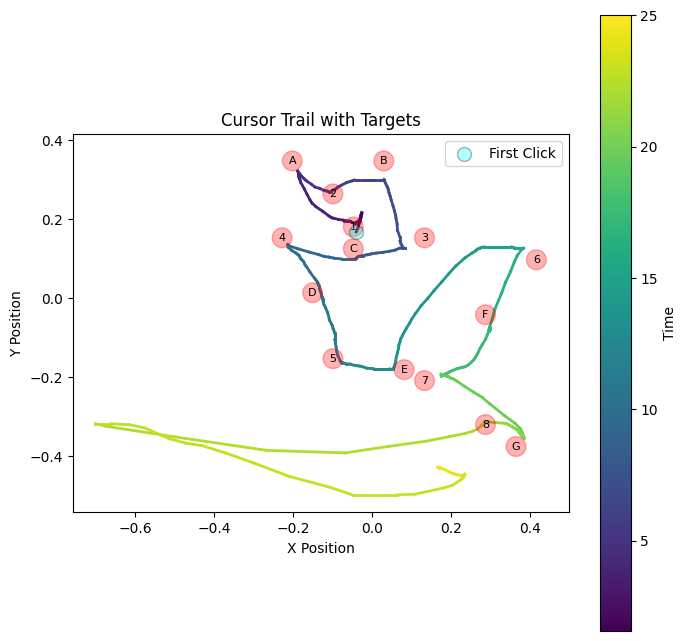

-----------------------------------------------

Trial ID: 4
Trial Type: TrialType.PART_A
Trial order: 16
Correct targets touches from analysis: nan
Wrong targets touches from analysis: nan


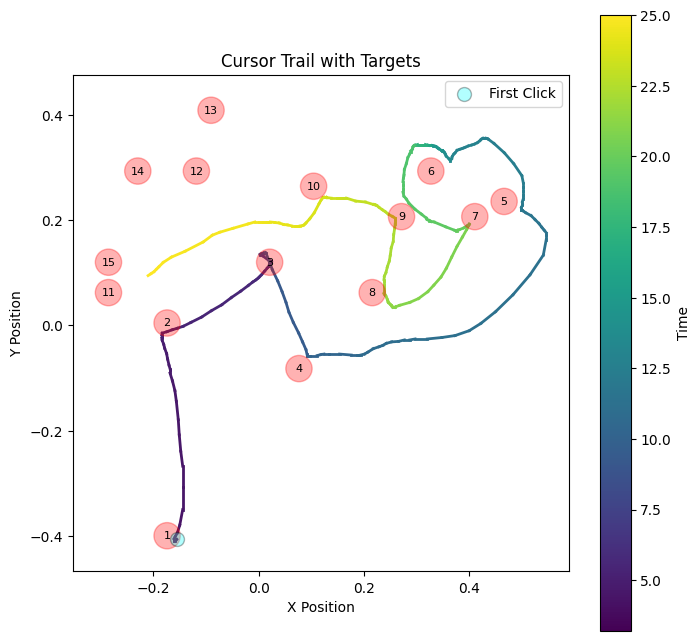

-----------------------------------------------

Trial ID: 19
Trial Type: TrialType.PART_B
Trial order: 17
Correct targets touches from analysis: nan
Wrong targets touches from analysis: nan


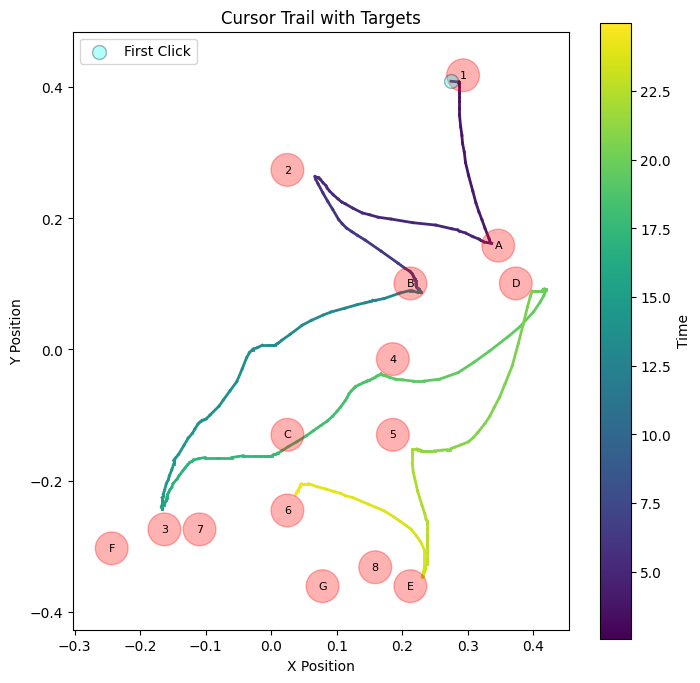

-----------------------------------------------

Trial ID: 7
Trial Type: TrialType.PART_A
Trial order: 18
Correct targets touches from analysis: 8.0
Wrong targets touches from analysis: 2.0


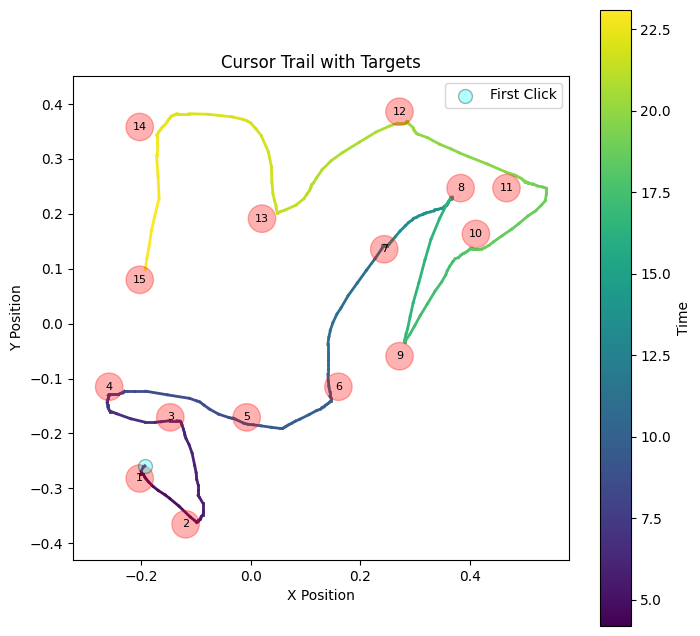

-----------------------------------------------

Trial ID: 13
Trial Type: TrialType.PART_B
Trial order: 19
Correct targets touches from analysis: nan
Wrong targets touches from analysis: nan
ERROR PLOTTING TRIAL
Trial ID: 20
Trial Type: TrialType.PART_A
Trial order: 20
Correct targets touches from analysis: nan
Wrong targets touches from analysis: nan


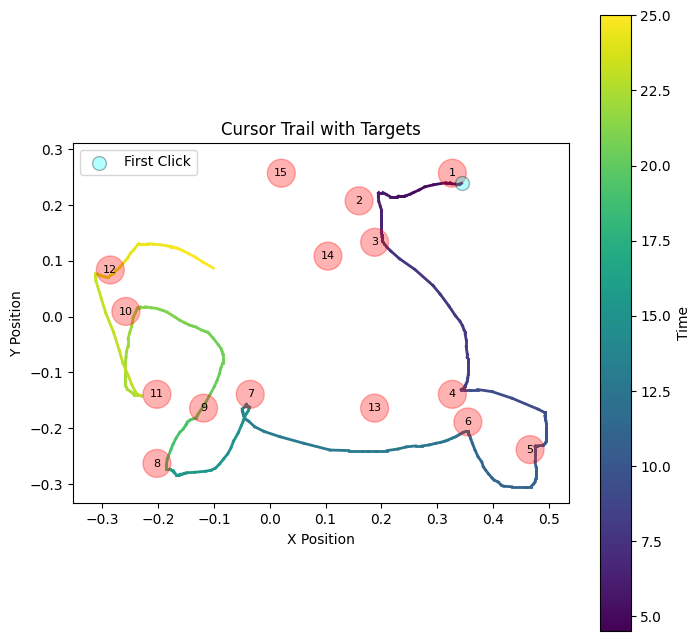

-----------------------------------------------

Trial ID: 0
Trial Type: TrialType.PART_B
Trial order: 21
Correct targets touches from analysis: nan
Wrong targets touches from analysis: nan


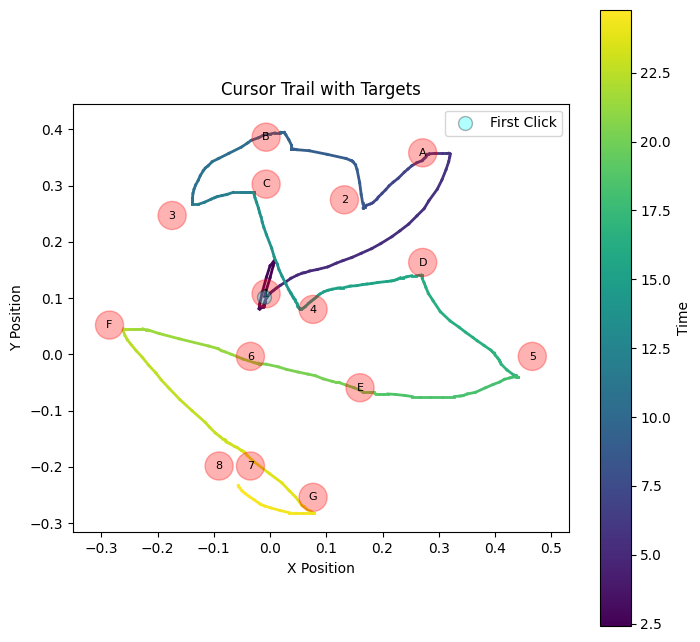

-----------------------------------------------



In [16]:
for trial in subject.testing_trials:
    print("Trial ID:", trial.id)
    print("Trial Type:", trial.trial_type)
    print("Trial order:", trial.order_of_appearance)
    print("Correct targets touches from analysis:", subject_analysis[subject_analysis['trial_id'] == trial.id]['non_cut_correct_targets_touches'].values[0])
    print("Wrong targets touches from analysis:", subject_analysis[subject_analysis['trial_id'] == trial.id]['non_cut_wrong_targets_touches'].values[0])

    try:
        plot_with_color(trial, subject.canvas_size, subject.target_radius)
        plt.show()
    except:
        print("ERROR PLOTTING TRIAL")
        continue
        
    print("-----------------------------------------------")
    print("")
    
